# Симплекс метод

**Симплекс-метод** — алгоритм решения оптимизационной задачи линейного программирования путём перебора вершин выпуклого многогранника в многомерном пространстве.

- целевая функция

# Симплекс метод. Пример

Для откорма животных на ферме в их еженедельный рацион необходимо включать 

- не менее 33 ед. питательного вещества А, 

- 23 ед. питательного вещества В 

- 12 ед. питательного вещества С. 


Для откорма используется 3 вида кормов.

Данные о содержании питательных веществ и стоимость одной весовой единицы каждого из кормов помещены в таблице:

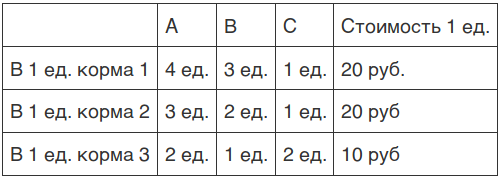

Составить наиболее дешёвый рацион, при котором каждое животное получало бы необходимые количества питательных веществ А, В, С

Формализуем задачу.

$q_1$, $q_2$ и $q_3$ - количество закупаемого корма 1, 2 и 3 соответственно. Это искомые переменные

$P_1$, $P_2$ и $P_3$ - цена корма 1, 2 и 3 соответственно. 

Основная задача - минимизировать функцию:

$$ q_1 P_1 + q_2 P_2 + q_3 P_3 \rightarrow min $$


Соблюдая при этом ограничения:

${4} q_1 + {3} q_2 + {2} q_3 \ge 33$

${3} q_1 + {2} q_2 +  q_3 \ge 23$

$q_1 +  q_2 + {2} q_3 \ge 12$

Дроби означают содержание питательных веществ в корме.



In [3]:
import numpy as np
from scipy.optimize import linprog

In [75]:
p1 = 20
p2 = 20
p3 = 10

# коэффициенты для неравенств
A = np.array([[4,  3,  2], 
              [3,  2,  1],
              [1,  1,  2]])
# правая часть неравенств
b = np.array([ 33,  23, 12])

# первый параметр - набор коэффициентов в функции, которую нужно минимизировать
# A_ub - коэффициенты для неравенств вида Ax <= b
# b_ub - правая часть неравенств
# здесь A_ub и b_ub взяты со знаком минус, ибо неравенства в задаче имеют обратный знак
r = linprog([p1, p2, p3], 
        A_ub = -A, 
        b_ub = -b)

print(r)

# q1,q2,q3 = r.x
# print(f"""Оптимальное количество закупок кормов:
# корм 1: {q1:.2f}
# корм 2: {q2:.2f}
# корм 3: {q3:.2f}
# """)
x = r.x
# x = np.array([6.5, 0, 3.5])

print("Проверка:")
print(sum(A[0]*x))
print(sum(A[1]*x))
print(sum(A[2]*x))
print(sum(np.array([p1, p2, p3])*x))

     fun: 165.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0. , 0.5, 0. ])
  status: 0
 success: True
       x: array([7. , 0. , 2.5])
Проверка:
33.0
23.5
12.0
165.0


## Пример 2

- автобаза обслуживает 3 овощных магазина,

- причём товар доставляется в магазин из 2 плодоовощных баз.

- Ежедневно вывозится с первой базы 12 т товара, со второй – 15 т.

- При этом завозится в первый магазин 8 т, во второй – 9 т, в третий --10 т. Стоимость перевозки 1 т товара (в рублях) приведена в таблице.

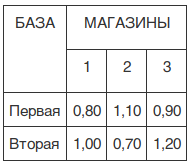

- Нужно спланировать перевозки так, чтобы их общая стоимость была минимальной.

### Решение
Другими словами, нужно решить сколько и из каких баз выгоднее возить товар в каждый из магазинов.

$q_{ij}$ - количество товара перевозимого из базы $i$ в магазин $j$


$$ 0.8 q_{11} + 1.1 q_{12} + 0.9 q_{13} + 1.0 q_{21} + 0.7 q_{22} + 1.2 q_{23} \rightarrow min $$

При этом с базами заключён договор на вывоз следующего количества товара

$ q_{11} + q_{12} + q_{13} = 12 $

$ q_{21} + q_{22} + q_{23} = 15 $


Аналогичная договорённость (только на привоз) товара с магазинами:

$ q_{11} + q_{21} = 8 $

$ q_{12} + q_{22} = 9 $

$ q_{13} + q_{23} = 10 $


In [77]:
c = np.array([0.8, 1.1, 0.9, 1.0, 0.7, 1.2])
A = np.array([[1, 1, 1, 0, 0, 0],
              [0, 0, 0, 1, 1, 1],
              [1, 0, 0, 1, 0, 0],
              [0, 1, 0, 0, 1, 0],
              [0, 0, 1, 0, 0, 1]])
b = np.array([12, 15, 8, 9, 10])

linprog(c, A_eq = A, b_eq = b)

     fun: 22.900000000000002
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 2.,  0., 10.,  6.,  9.,  0.])